In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_data = [ 338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [ 640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
# y_data = b + w * x_data

In [3]:
x = np.arange(-200, -100, 1) # bias
y = np.arange(-5, 5, 0.1) # weight
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)

for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] + (y_data[n] -b + w*x_data[n])**2
        Z[j][i] = Z[j][i]/len(x_data)

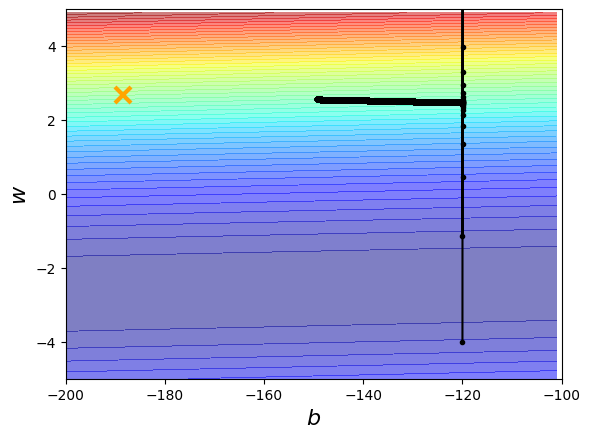

In [7]:
# y_data = b + w * x_data
b = -120
w = -4
lr = 0.000001 # learning rate
iteration = 100000

# Store initial values for plotting.
b_history = [b]
w_history = [w]

# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
        
    # Update parameters.
    b = b - lr * b_grad
    w = w - lr * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()